<a href="https://colab.research.google.com/github/taskswithcode/MLIntro/blob/main/notebooks/WhatDoesGradientCapture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This is the notebook for the video
- [What does a Gradient capture? ](https://youtube.com/shorts/mPVBgwBjbTQ?si=KhPvKNZtxxdhnPSs) [ ![Watch](https://raw.githubusercontent.com/taskswithcode/image_assets/main/.github/images/Watch.svg)](https://youtube.com/shorts/mPVBgwBjbTQ?si=KhPvKNZtxxdhnPSs)
- [Code walkthrough of this notebook](https://youtu.be/4uglNXvtTSE) [![Code Walkthrough](https://raw.githubusercontent.com/taskswithcode/image_assets/main/.github/images/walkthrough.svg)](https://youtu.be/4uglNXvtTSE)


Let's say we want to algorithmically nudge the red point on the curve below towards the the lowest point on the curve. We can do this with gradients. ***Gradient captures the direction of the steepest descent at a point.*** We can use the gradient computed at that point, to nudge that point down the curve. This idea is utilized in training neural networks.


#### The basic intuition for what Gradient is...

The image below is a plot of a function of a single variable X

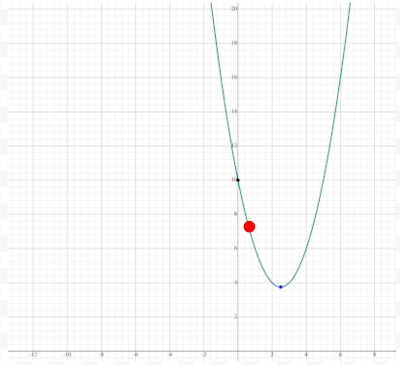

Lets first define the function shown in the plot above.

In [ ]:
def function(x):
  return x**2 - 5*x + 10


The red point A on the curve above is on the left side of the lowest point of the function plot. We will nudge it down the curve by computing gradients

In [ ]:
X = .5
print("Point A = ",X,function(X))

Point A =  0.5 7.75


Now let's define the function to compute the gradient at any point for a single-variable function. Gradient computation, typically done using calculus, can be approximated by the following steps for the one-dimensional case:

- Find the y coordinate of a point by evaluating the function at its x coordinate, i.e., compute f(x). This is the function's response to an input x.
- Increment the x coordinate by a small amount, denoted as h.
- Evaluate the function again for this incremented value, f(x+h), to understand the function's response to the input x+h.
- Calculate the rate of change of the function's response, given by (f(x+h) - f(x)) / h. This is the gradient of the function at the point x in one dimension.
- This number indicates the rate at which the function output changes for a small tweak of the variable x.
- The sign of this number captures the direction of the change, indicating whether the function output increases or decreases when x is incremented.

Note: In this single-variable context, the gradient is a one-dimensional vector represented by the number (scalar value) computed above. See FAQ below for the difference between a vector and a scalar

In [ ]:
def compute_gradient(x,h,f):
  gradient = (f(x+h) - f(x))/h
  return gradient

h = .001 #this is the small increment we add to the x coordinate
learning_rate = .05 #this is a small fraction of the gradient we use to nudge the x coordinate of a point

Now lets nudge point A few times by iteratively computing gradients at each step

In [ ]:
def iterative_nudge(x):
  for i in range(5):
    grad = compute_gradient(x,h,function)
    print("Gradient is:",grad)

    x = x - learning_rate*grad
    print(f"New point after {i+1} nudge(s):",x,function(x))
    print()

iterative_nudge(X)

Gradient is: -3.999000000000308
New point after 1 nudge(s): 0.6999500000000154 6.990180002499945

Gradient is: -3.599099999999744
New point after 2 nudge(s): 0.8799050000000026 6.374707809024992

Gradient is: -3.2391900000003915
New point after 3 nudge(s): 1.0418645000000222 5.876159136360185

Gradient is: -2.915270999999109
New point after 4 nudge(s): 1.1876280499999776 5.4723201351468616

Gradient is: -2.623743900000086
New point after 5 nudge(s): 1.318815244999982 5.145197425444453



The point A was nudged closer to the lowest point of the curve after these iterations

Lets take another point B that is on the right of the lowest point and apply the same procedure

In [ ]:
X = 4
print("Point B = ",X,function(X))

Point B =  4 6


In [ ]:
iterative_nudge(X)

Gradient is: 3.0010000000011416
New point after 1 nudge(s): 3.849949999999943 5.572365002499845

Gradient is: 2.700900000000672
New point after 2 nudge(s): 3.7149049999999093 5.225994159024779

Gradient is: 2.4308099999998944
New point after 3 nudge(s): 3.5933644999999146 4.945445929860064

Gradient is: 2.1877289999991945
New point after 4 nudge(s): 3.483978049999955 4.718212802881714

Gradient is: 1.9689560999989197
New point after 5 nudge(s): 3.385530245000009 4.5341638148097765



B was also nudged closer to the lowest point of the curve after these iterations

*Regardless of any position on the curve we start from, we can nudge a point from that position down towards the lowest point by computing gradients*

#### So how is this used to train neural networks?




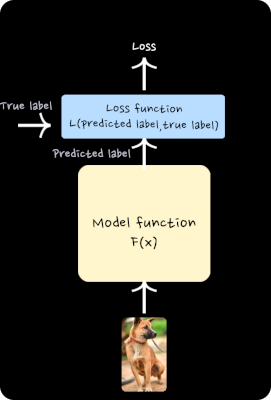




Any neural net model is made up of two key functions, shown in the image above
- **a model function** the converts input to an output, which we typically call the model's prediction. For example, a model may convert the image of a dog to a single number 1 or 0. A model's function is made up of tweakable numbers or parameters. The values of these numbers determine if the model outputs a 1 or a 0 for a specific image.
- **a loss function** that takes the model's prediction as input and compares it with the ground truth that humans have labeled. The loss function outputs a single number - the prediction error, that captures how far off the model's prediction is from the ground truth label. The goal of training is to reduce this value.

So it comes down to, what do we tweak in the loss function to reduce the loss?

To answer this question, lets note that the output of the loss function depends on both the predicted label and the ground truth label.

That is, if
-  F(x) is the model function where x is the input image.

The loss is
- L(predicted label, ground truth label).

In other words, is the loss function  L is
- L(**F(x)**, ground truth label).

In the expression above,
 - The ground truth label is a constant. We dont want to change that!
 - So the only way to reduce loss is through the model function F(x).
  - Clearly, we dont want to tweak the input image x to the model function either. That is the training data for the neural network
  - We saw above, the model function is made up of tweakable numbers. We can tweak the model parameters to reduce prediction error.

That is exactly what we do. We use the loss function output, which is the prediction error, to tweak the model parameters and reduce the error. Gradients help us tweak each model parameter to reduce the prediction error.

The learning approach for any neural net model can be approximated by a simple procedure without using Calculus

- first send an input through the model. That is, compute F(x)
- then send the model output to the loss function. That is, compute L(F(x),ground truth label). This is a single number. Lets call it E1
- Bump up a model parameter by a value 'h'.
- Send the **same input again** through the model. That is compute F(x) again with the bumped up model parameter setting. Then compute loss value again L(F(x),ground truth label) for this tweaked setting. Lets call this value E2.
- Find the rate of chage of error (or gradient) - (E2 - E1)/h and save this value for the last step below
- Repeat the steps above and compute gradient for each model parameter.
- Now lets take all the saved gradients we computed with respect to each parameter, and subtract them from  the corresponding model parameter.

Repeat steps above for each training input.

Note in the real world, we do this efficiently using Calculus. Also, this approach has several significant drawbacks beyond mere inefficiency, which we will revisit later *(explained in the notes below)*.  It is only an approximation to develop an intuition of how models learn. We will examine how it is actually performed in a future notebook

Neural nets are complex functions made up of millions or even billions of tweakable numbers or parameters.

We computed gradients to nudge a point down the curve of a function of a single variable (tweakable number) above.  Lets apply the same procedure to a function of three variables, to convince ourselves this approach will work for a model with any number of tweakable parameters


##### Lets compute gradients for a function with three **variables (tweakable parameters)**

In [ ]:
a = 2
b = -3
c = 10
value = a * b + c
print("function output:",value)

function output: 4


##### Our objective, as before, is to figure out how to tweak these variables so that the output of the function increases *(or decreases which is the one  of interest to us in our loss function use case - we want to reduce the error or loss)*

##### To figure this out lets start by examining how these variables individually affect the function output

##### We are first going to change these parameters individually by a fixed value **h**

In [ ]:
h = .1 #constant value used to increment the value of each variable

###### Lets change **variable a** first and see how the function responds

In [ ]:
d1 = a*b+c
print("input before:",a, "  Input after incrementing:",a+h)
a = a + h
d2 = a*b + c
print("Output before:",d1, "  Output after incrementing:",d2)

input before: 2   Input after incrementing: 2.1
Output before: 4   Output after incrementing: 3.6999999999999993


*When we **changed variable a** by adding a tiny amount **h**, the function output went **down** a little. So **increasing variable a decreases** the output*

In [ ]:
GradA = (d2-d1)/h
print("Gradient at point A:",GradA)

Gradient at point A: -3.000000000000007


*This value captures the **rate of change or gradient** of function for **variable a**. We will use it below*

###### Lets change **variable b** and see how the function responds

In [ ]:
d1 = a*b+c
print("input before:",b, "  Input after incrementing:",b+h)
b = b + h
d2 = a*b + c
print("Output before:",d1, "  Output after incrementing:",d2)

input before: -3   Input after incrementing: -2.9
Output before: 3.6999999999999993   Output after incrementing: 3.91


*When we **changed variable b** by adding a tiny amount **h**, the function output went **up** a little. So **increasing variable b increases** the output*

In [ ]:
GradB = (d2-d1)/h
print("Gradient at point B:",GradB)

Gradient at point B: 2.1000000000000085


*This value captures the **rate of change** of function output for **variable b**. We will use it below*

###### Lastly, lets change **variable c** and see how the function responds

In [ ]:
d1 = a*b+c
print("input before:",c, "  Input after incrementing:",c+h)
c = c + h
d2 = a*b + c
print("Output before:",d1, "  Output after incrementing:",d2)

input before: 10   Input after incrementing: 10.1
Output before: 3.91   Output after incrementing: 4.01


*When we **changed variable c** by adding a tiny amount **h**, the function output went **up** by same amount. So **increasing variable c increases** the output*

In [ ]:
GradC = (d2-d1)/h
print("Gradient at point C:",GradC)

Gradient at point C: 0.9999999999999964


*This value captures the **rate of change** of function output for **variable c**. We will use it below*




---


##### **Finding so far:** When we **increased two variables (b and c)** the output went **up**, whereas when we **increased  variable a** the output went **down**.

How can we know ***which direction to turn the parameters*** so the function output ***increases*** (or decreases) ?

The gradients we calculated above ***(grada,gradb,gradc)*** with respect to each variable can be used for this. It tells which direction to tweak a parameter.




---




##### We are now going to **change** these parameters individually by **adding**  a small fraction of the gradients computed above



In [ ]:
lr = .01 #this is the fraction of the gradients we are going to take

###### Lets add a fraction of the gradient **GradA** to  **variable a**  and see how the function responds

In [ ]:
a = 2
b = -3
c = 10
lr = .01
d1 = a*b + c
print("Gradient at point A:",GradA)
print(f"Original value of a: {a};  Value of a after adding a fraction of the gradient to it: {a+lr*GradA}")
a = a + lr*GradA #We increase "a" by a small fraction of the gradient
d2 = a*b + c
print("Output before:",d1, "  Output after adding gradient:",d2)

Gradient at point A: -3.000000000000007
Original value of a: 2;  Value of a after adding a fraction of the gradient to it: 1.97
Output before: 4   Output after adding gradient: 4.09


###### The output goes **up** when we changed **parameter a** by adding a small fraction of the gradient **GradA**. Note, the output when **down** before when we **changed a** by adding a small amount **h**. The reason it goes up now when we change it by a small fraction of the gradient is, when we are adding a fraction of the gradient to **a**, we are **effectively decreasing the value of a**. This is because the gradient is **negative**
See the value of **a** before and after adding the *fraction of the gradient* - it goes down from 2 to 1.97 while the output goes up from 4 to 4.09

###### Lets add a fraction of the gradient **GradB** to  **variable b**  and see how the function responds

In [ ]:
a = 2
b = -3
c = 10
lr = .01
d1 = a*b + c
print("Gradient at point B:",GradB)
print(f"Original value of b: {b};  Value of a after adding a fraction of the gradient to it: {b+lr*GradB}")
b = b + lr*GradB
d2 = a*b + c
print("Output before:",d1, "  Output after adding gradient:",d2)

Gradient at point B: 2.1000000000000085
Original value of b: -3;  Value of a after adding a fraction of the gradient to it: -2.979
Output before: 4   Output after adding gradient: 4.042


###### *The output goes **up** when we change **parameter b** by adding a small fraction of the gradient **GradB**.*

###### Lets add a fraction of the gradient **GradC** to  **variable c**  and see how the function responds

In [ ]:
a = 2
b = -3
c = 10
lr = .01
d1 = a*b + c
print("Gradient at point C:",GradC)
print(f"Original value of c: {c};  Value of a after adding a fraction of the gradient to it: {c+lr*GradC}")
c = c + lr*GradC
d2 = a*b + c
print("Output before:",d1, "  Output after adding gradient:",d2)

Gradient at point C: 0.9999999999999964
Original value of c: 10;  Value of a after adding a fraction of the gradient to it: 10.01
Output before: 4   Output after adding gradient: 4.01


###### *The output goes **up** when we change **parameter c** by adding a small fraction of the gradient **GradC**.*




---


##### **Finding so far:** The function output **increased** when we **individually changed** each variable by adding a **fraction of the gradient** with respect to that variable.

Also note the three tweakable variables a,b,c moved from (2,-3,10) to (1.97,-2.979,10.01). Even though we tweaked each one of them individually (each variable constituting one dimension), the cumulative effect of this individual tweaking is a movement in the three dimensional space (where each variable constitutes an axis). The direction of this vector is the direction that gradient captures, which in this case is the **direction of steepest ascent**


---



##### Lets examine function output if we **change** these parameters individually by **subtracting** a small fraction of the gradients computed above

###### So lets subtract a fraction of the gradient **GradA** from  **variable a**  and see how the function responds

In [ ]:
a = 2
b = -3
c = 10
lr = .01
d1 = a*b + c
print("Gradient at point A:",GradA)
print(f"Original value of a: {a};  Value of a after adding a fraction of the gradient to it: {a-lr*GradA}")
a = a - lr*GradA #We increase "a" by a small fraction of the gradient
d2 = a*b + c
print("Output before:",d1, "  Output after adding gradient:",d2)

Gradient at point A: -3.000000000000007
Original value of a: 2;  Value of a after adding a fraction of the gradient to it: 2.0300000000000002
Output before: 4   Output after adding gradient: 3.9099999999999993


###### *The output goes **down** when we **change parameter a** by subtracting a small fraction of the gradient **GradA**.*

###### Lets subtract a fraction of the gradient **GradB** from  **variable b**  and see how the function responds

In [ ]:
a = 2
b = -3
c = 10
lr = .01
d1 = a*b + c
print("Gradient at point B:",GradB)
print(f"Original value of b: {b};  Value of a after adding a fraction of the gradient to it: {b-lr*GradB}")
b = b - lr*GradB
d2 = a*b + c
print("Output before:",d1, "  Output after adding gradient:",d2)

Gradient at point B: 2.1000000000000085
Original value of b: -3;  Value of a after adding a fraction of the gradient to it: -3.021
Output before: 4   Output after adding gradient: 3.958


###### *The output goes **down** when we **change parameter b** by subtracting a small fraction of the gradient **GradB**.*

###### Lets subtract a fraction of the gradient **GradC** to  **variable c**  and see how the function responds

In [ ]:
a = 2
b = -3
c = 10
lr = .01
d1 = a*b + c
print("Gradient at point C:",GradC)
print(f"Original value of c: {c};  Value of a after adding a fraction of the gradient to it: {c-lr*GradC}")
c = c - lr*GradC
d2 = a*b + c
print("Output before:",d1, "  Output after adding gradient:",d2)

Gradient at point C: 0.9999999999999964
Original value of c: 10;  Value of a after adding a fraction of the gradient to it: 9.99
Output before: 4   Output after adding gradient: 3.99


###### *The output goes **down** when we **change parameter c** by subtracting a small fraction of the gradient **GradC**.*



---


##### **Finding so far:** The function output **decreased** when we **individually changed** each variable by subtracting a **fraction of the gradient** with respect to that variable

Also note the three tweakable variables a,b,c moved from (2,-3,10) to (2.03,-3.021,9.99). Even though we tweaked each one of them individually (each variable constituting one dimension), the cumulative effect of this individual tweaking is a movement in the three dimensional space (where each variable constitutes an axis). The direction of this vector is the direction that gradient captures, which in this case is the **direction of steepest descent**



---






---



##### **Final Summary:** If we want to know which direction to tweak all the variables (parameters) of a function to **increase** the output of a function, we just need to **add to each variable**, **the gradient** (or a fraction of it) of the function **with respect to that variable**.

##### Conversely, to **decrease** the output of a function, we just need to **subtract** from  each variable, the **gradient** (or a fraction of it) of the function **with respect to that variable.**

##### The gradient of a variable has two pieces of information. It contains
- the direction to tweak a variable, and
- how much to tweak a variable.





---

The above argument applies no matter how many parameters a function has, or how complex the function is. Most neural nets have multiple layers of parameters embedded in a complex expression. As an approximation of such a complex expression, in the example below, the output function depends
- directly on some parameters
- and also another function which in turn depends on few other parameters that are not directly present in the output function.

##### The observations we made earlier still applies.

In [ ]:
h = .1
a = 1
b = -1
c = -2
d = 3
e = -2
f = d*e*c
d1 = a*b*f # d is only used indirectly through f in the output function
print("input before:",d, "  Input after incrementing:",d+h)
d = d + h
f = d*e*c
d2 = a*b*f
print("Output before:",d1, "  Output after incrementing",d2)

input before: 3   Input after incrementing: 3.1
Output before: -12   Output after incrementing -12.4


In [ ]:
GradD = (d2-d1)/h
GradD

-4.0000000000000036

In [ ]:
h = .1
a = 1
b = -1
c = -2
d = 3
e = -2
lr = .01
f = d*e*c
d1 = a*b*f
#print(d,d + lr*GradD)
d = d + lr*GradD
f = d*e*c
d2 = a*b*f
print("Output before:",d1, "  Output after adding gradient:",d2)

Output before: -12   Output after adding gradient: -11.84


In [ ]:
h = .1
a = 1
b = -1
c = -2
d = 3
e = -2
lr = .01
f = d*e*c
d1 = a*b*f
#print(d,d - lr*GradD)
d = d - lr*GradD
f = d*e*c
d2 = a*b*f
print("Output before:",d1, "  Output after subtracting gradient:",d2)

Output before: -12   Output after subtracting gradient: -12.16


#### **FAQ**
- ***Why cant we find minima of neural network functions like we did in school?*** In the case of the simple functions examined above, closed-form solutions (i.e. setting derivative of function to zero and solving for it) exist for finding the minimum. However, neural networks represent complex functions for which no closed-form solutions are available to determine the minima. In these scenarios, it's necessary to compute gradients and update model parameters accordingly
- ***How are gradients actually computed in neural networks?*** As previously mentioned, the gradient computation in this notebook is an approximation. In practice, gradient computation is performed by calculating the derivative of the loss function with respect to each parameter. This calculation is efficiently executed using the **backpropagation algorithm**. The model parameter updates are done efficiently using an **optimizer**. We will examine both these algorithms in a future notebook.
- ***Are gradients vectors or scalars?*** In our examples above, gradients were computed as one-dimensional vectors containing the partial derivative with respect to each parameter, and each parameter was updated accordingly. But, in a model with multiple parameters, the gradient is an n-dimensional vector, where 'n' represents the number of parameters. This vector's components correspond to the gradient with respect to each individual parameter, efficiently computed and updated together using an optimizer.
  - Additionally, it's crucial to understand that a one-dimensional vector is distinct from a scalar. A scalar is just a number, which could be either positive or negative, and it lacks direction. Vectors and scalars are different types of mathematical objects. Any vector, regardless of its dimension, can be multiplied by a scalar, which scales the vector (when the scalar value is negative, it has the effect of reversing the direction of the vector it scales). Although a one-dimensional vector is represented by a single number, we can only do a dot product operation (explained in a future notebook) of this one-dimensional vector with another one-dimensional vector. That is, a dot product can be performed between any two vectors of equal dimensions.
  - In the examples above we computed the gradient for one variable at a time even for a function of multiple variables. We used the scalar quantity we computed, **(f(x+h) - f(x))/h** (an approximation for derivative using Calculus) in a one-dimensional vector. The sign of the scalar quantity determined the direction of the one-dimensional gradient vector. It was the combination of these individual one-dimensional gradient vectors that determined the actual direction of descent - for example the movement from (2,-3,10) to (2.03,-3.021,9.99) in the example earlier.
  - In terms of notation and representation, particularly in programming languages like Python, a scalar is typically represented by a number, while a 1D vector is represented as an array with one value. In mathematical notation, a scalar is often denoted simply, typically italicized (e.g., α), in contrast to a 1D vector, which is denoted as v = [v1], emphasizing its vector nature even when it contains only a single component.
  - In traditional mathematics, the derivative of a function with a single variable is a scalar, representing the rate of change of the function with respect to that variable. When we extend to functions of multiple variables, the concept of a gradient comes into play. The gradient is a vector, each component of which is a partial derivative with respect to one of the variables, indicating the direction of the steepest ascent of the function.
  - In the realm of machine learning and its associated libraries like TensorFlow or PyTorch, even derivatives of single-variable functions are often treated as one-dimensional vectors or tensors. This approach is not about altering the fundamental mathematical principles, but rather about practicality and ensuring consistency in computational operations across various functions and algorithms.
  - Viewing single-variable derivatives as one-dimensional vectors is particularly useful when considering the extension to multivariable cases. In these scenarios, the gradient can be understood as an aggregation of these individual directional changes along each variable's axis. Thus, while the mathematical theory treats single-variable derivatives as scalars, practical implementations in machine learning often adopt a vectorized perspective for greater computational efficiency and uniformity across different types of functions.
- ***What is the need for a learning rate?*** We update each variable with only a small fraction of the gradient, determined by the learning rate. This approach is necessary because the computed gradient can be large, and directly updating the model parameters with this value might cause the loss to potentially overshoot, jumping past a minimum. This could make the training process unstable - the loss could jump back and forth past a minimum.
  -  In practice, the fraction of the gradient used to update a parameter can vary depending on the magnitude of the parameter and the optimization algorithm being used.
- ***Do all loss functions output a single number (scalar)?***  Yes, in general a loss function is a function that takes a vector as input (not just a single number) and outputs a single number. The gradient of the loss function is a vector comprised of partial derivatives with respect to each element in the input vector.
- ***What is a counterintuitive aspect of gradient computation?*** We reduced loss by tweaking each parameter separately ignoring the other parameters, which is what we do even when we use Calculus (partial derivatives find the rate of change of a function with respect to a single variable, treating all other variables constant). This approach appears to treat each parameter to be independent of each other. Few thoughts about this
  - First it is this simplification of treating each parameter to be independent of each other that makes this approach of minimizing loss tractable.
  - However, one may feel tweaking each parameter individually to reduce loss is like a [whack-a-mole game](https://en.wikipedia.org/wiki/Whac-A-Mole) . It isnt for the following reasons
   - In practice the interdependencies between parameters are implicitly addressed because even though the gradient computation treats each parameter individually, each update **considers the current state of all parameters**, performing a holistic adjustment to the model.
   - Also, in practice the model loss is computed, not just for one input, but for a batch of inputs. The computed loss is the average loss for a batch. The implication of averaging the loss across a batch, is that a model parameter update depends on the prediction error of not just one input, but on a set of inputs. This can smooth out the effect of an outlier input or the impact of an input with a wrong ground truth label (e.g. cat wrongly labeled by humans as dog).
   - Also, the interdependencies across parameters are implicitly addressed across iterations. For instance, certain optimizers (algorithms that perform actual update of parameters with gradients), use different learning rate values for each parameter, based on several criteria. This implicitly addresses the interdependencies among parameters.
   - There are a host of other techniques that directly or indirectly mitigate the potential whack-a-mole effect that may arise from treating each parameter separately when computing loss. We will examine them in future notebooks. Some of these are techniques like regularization (discourages parameters with large magnitudes), momentum (gradient updates are done taking into account past gradient updates to eliminate drastically changing direction based on the just the current gradient update), dropout (prevents the neural network from overly relying on a single neuron's parameters), batch normalization (normalizing the input to each layer in a network for more stable and faster training), ensemble methods (combining the predictions of multiple models to reduce the impact of any one model's idosyncracies due to specific aspects of data)


The content of this notebook is adapted from and inspired by [Andrej Karpathy's video on neural networks](https://youtu.be/VMj-3S1tku0)